In [11]:
#Import Libraries 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pylab import rcParams
import seaborn as sns
import numpy as np

In [12]:
#Load the Data 
nyctaxi=pd.read_csv("C:/Users/kfeng3/Desktop/nyfinal.csv")
nyctaxi.head()

,fare_amount,pickup_date,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,...,dist,to_jfk,to_nkw,to_lag,to_msg,to_ts,to_esb,to_grand,to_bronx,to_nyc
0,23.5,8/12/2014,15,-108.202955,-19.721222,-108.202955,-19.721222,1,2014,8,...,0.0,15193.778440,15164.467810,15209.656180,15192.980770,15195.312620,15193.335840,15194.937580,23605.23631,15185.092450
1,17.5,2/11/2014,21,-75.922994,45.341914,-75.922994,45.341914,1,2014,2,...,0.0,1101.942805,1072.925895,1067.864668,1068.065985,1066.670891,1068.881190,1068.371457,17513.24755,1075.206450
2,14.5,7/5/2014,19,-74.286961,40.601740,-74.286961,40.601740,1,2014,7,...,0.0,86.344916,27.221681,80.019580,59.547879,61.751908,60.379124,62.100756,17056.77066,53.532202
3,52.0,11/21/2014,0,-74.276111,40.607328,-74.276111,40.607328,1,2014,11,...,0.0,84.399382,25.057902,77.812942,57.334237,59.538292,58.166096,59.887698,17055.20167,51.332119
4,52.0,11/19/2014,7,-74.177182,40.695018,-74.177182,40.695018,1,2014,11,...,0.0,68.369656,1.307827,54.395321,33.342333,35.352339,34.387792,36.063721,17042.44498,29.107163


In [13]:
#Pre-Processing the Date
nyctaxi["pickup_date"]=pd.to_datetime(nyctaxi["pickup_date"], format="%m/%d/%Y")
nyctaxi["pickup_date"].head()

0   2014-08-12
1   2014-02-11
2   2014-07-05
3   2014-11-21
4   2014-11-19
Name: pickup_date, dtype: datetime64[ns]

In [14]:
print ("Calendar Map Visualization of Taxi Fare(Month/Day)")
pivottable = pd.pivot_table(nyctaxi,
                            columns=['month'], index=['DayofWeek'], values='fare_amount', dropna=True, margins_name=True)
pivottable.style.background_gradient(cmap="Greens")

Calendar Map Visualization of Taxi Fare(Month/Day)


month,1,2,3,4,5,6,7,8,9,10,11,12
DayofWeek,,,,,,,,,,,,
1,11.7631,12.1977,12.4996,12.7078,13.2486,13.4166,13.2581,13.4595,13.289,13.2803,13.0389,12.9397
2,12.631,12.5016,12.4863,12.8153,13.3389,13.0401,12.7991,13.3792,13.3099,12.9824,12.9544,13.0491
3,12.4735,12.3564,12.3372,12.2699,13.5623,12.6252,12.6522,12.4616,13.2811,12.9161,13.3244,12.7668
4,12.1637,12.2145,12.3979,12.9707,13.5865,13.4559,12.7965,13.0543,13.2004,13.0914,13.1294,13.1164
5,12.3721,12.8194,12.8363,13.3568,13.3342,14.1761,13.3388,13.7941,13.7909,13.2112,13.3718,13.7586
6,12.3602,12.6073,12.7568,12.9863,13.1102,13.7515,13.2368,12.8332,12.8702,13.2537,13.2655,13.4515
7,11.6311,11.6413,12.0976,12.0654,12.7675,12.5917,12.3421,12.7131,12.6752,12.2382,12.6489,12.885


Text(0.5,1,'Heat Map Visualization of Taxi Fare(Month/Day)')

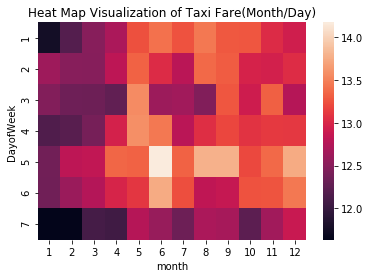

In [21]:
sns.heatmap(pivottable).set_title("Heat Map Visualization of Taxi Fare(Month/Day)")

In [22]:
print ("Calendar Map Visualization of Passenger Count")
pivottable = pd.pivot_table(nyctaxi,
                            columns=['DayofWeek'], index=['TimeofDay'], values='passenger_count')
pivottable.style.background_gradient(cmap='Oranges')

Calendar Map Visualization of Passenger Count


DayofWeek,1,2,3,4,5,6,7
TimeofDay,,,,,,,
Afternoon,1.76721,1.69596,1.68187,1.61667,1.68959,1.7164,1.76799
Evening,1.76227,1.68968,1.71224,1.68809,1.6895,1.72838,1.80787
Morning,1.69735,1.5992,1.61922,1.63856,1.61551,1.64515,1.68197
Noon,1.69217,1.65622,1.65222,1.66547,1.68994,1.61091,1.76132


Text(0.5,1,'Calendar Map Visualization of of Passenger Count')

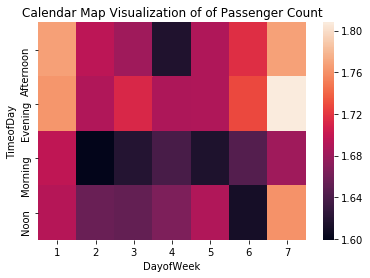

In [32]:
sns.heatmap(pivottable).set_title("Calendar Map Visualization of of Passenger Count")

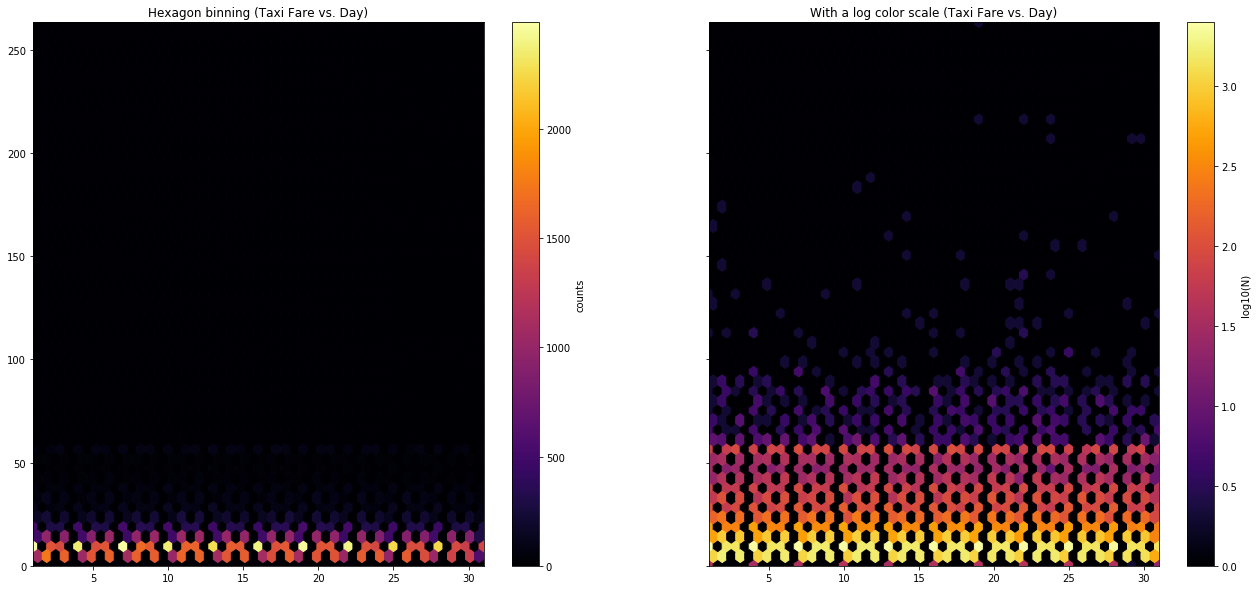

In [36]:
x=nyctaxi["day"]
y=nyctaxi["fare_amount"]
xmin=x.min()
xmax=x.max()
ymin=y.min()
ymax=y.max()
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning (Taxi Fare vs. Day)")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale (Taxi Fare vs. Day)")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

3D Visualizations of Fare Clusters


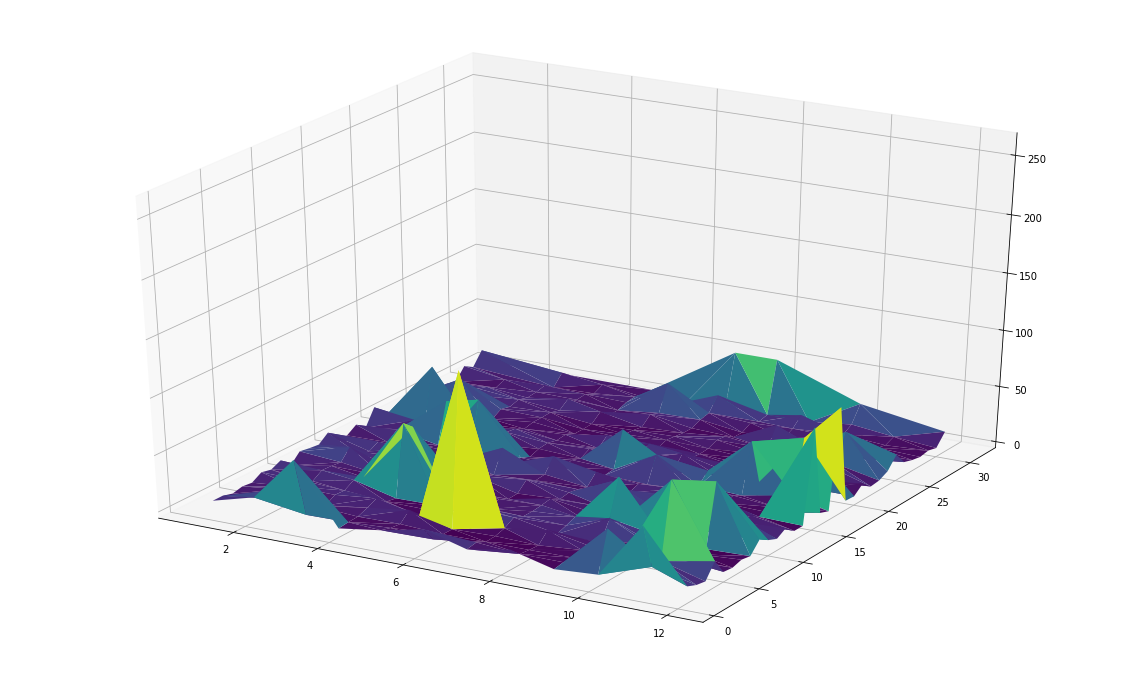

In [76]:
#3D
print("3D Visualizations of Fare Clusters")
# Make the plot
fig = plt.figure(figsize=(20,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(nyctaxi['month'], nyctaxi['day'], nyctaxi['fare_amount'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(nyctaxi['day'], nyctaxi['month'], nyctaxi['fare_amount'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(nyctaxi['month'], nyctaxi['day'], nyctaxi['fare_amount'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()
